# 第5章：地球数据科学的空间数据格式

在本章中，你将了解对地球数据科学有用的两种主要空间数据格式：矢量和栅格。

学完本章后，你将能够。

- 在Python中打开空间数据，包括使用Geopandas - gpd.read_file()的shapefiles和使用Python中Rasterio的栅格数据。
- 在Python中绘制空间数据，包括使用Geopandas的shapfiles - gpd.plot()和使用EarthPy的栅格数据。
- 描述3种关键矢量数据结构的特点：点、线和多边形。

## 第1课：地球数据科学的空间数据格式

欢迎来到《地球数据科学的空间数据格式》模块的第一课。有两种主要的空间数据格式对地球数据科学有用，即矢量和栅格。了解这两种用于地球数据科学工作流程的常用空间数据格式。

## 第2课： 将栅格数据用于地球数据科学

### Ⅰ. 什么是栅格数据？

栅格或 "网格 "数据以数值的网格形式存储，在地图上以像素形式呈现。每个像素值代表地球表面的一个区域，使数据具有空间性。栅格文件是由规则的单元格组成的，所有单元格的大小都是一样的。如果你曾在谷歌地球等工具中看过照片或图像，你就曾看过和使用过栅格。然而，你将使用的栅格文件与照片不同，因为它们是有空间参照的。每个像素代表地面上的一个区域。这个区域是由栅格的空间分辨率定义的。
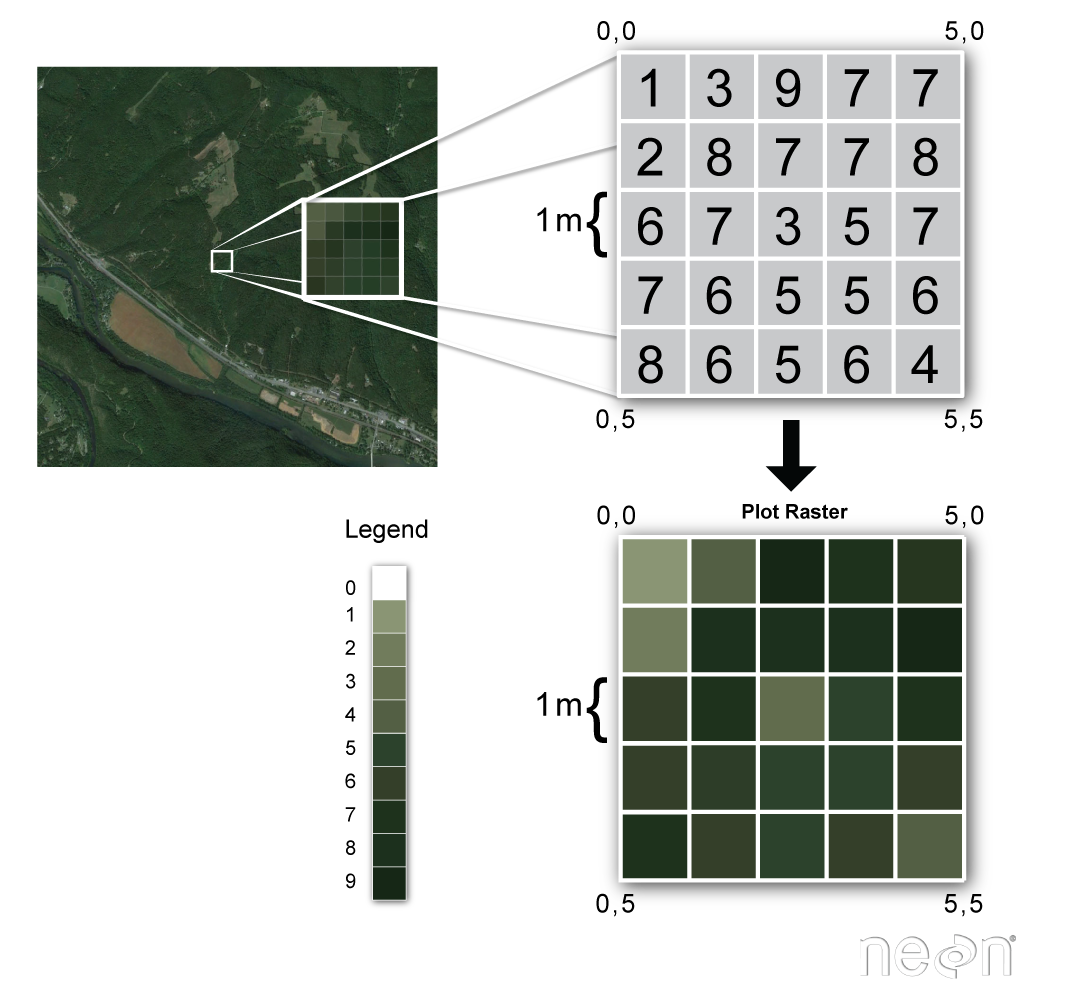

栅格是由一个有规律的单元格组成的。每个单元在X和Y方向上都是相同的大小

### Ⅱ. 栅格数据可以有一个或多个图层

栅格数据可以有一个或多个层。例如，一个高程模型通常只有一层，代表一个特定地点的地球表面的高程。然而，其他数据，包括图像和时间序列数据，可能会产生一个由多层组成的栅格文件。不同的文件类型可以用来容纳不同大小和结构的栅格数据。

### Ⅲ. 有许多不同的栅格文件格式

有许多不同的文件类型被用来存储栅格数据

#### 1. 作为单个文件存储的栅格数据

一些数据集，如Landsat和NAIP，被存储在单个文件中。对于Landsat，你通常会发现每个波段都存储为一个单独的.tif文件。NAIP将所有波段存储在一个.tif文件中。作为单一文件存储的光栅数据的常见文件类型包括。

- .tif/.tiff ：代表标签图像文件格式，是最常见的存储栅格数据的方式之一。一些图像卫星，如Landsat，如此分享他们的数据。
- .asc: 代表ASCII光栅文件。这是一种基于文本的格式，用于存储栅格数据。鉴于这种格式易于存储和分发，因此被使用。

**分层数据格式**

分层数据格式可以在一个单一的文件中存储许多不同类型的数据。这些格式是大型数据集的最佳选择，在这些数据集中，你可能想对数据进行子集或一次只处理部分数据。层次数据在工作中可能会比较麻烦，但它们往往能使处理更有效率。这种数据存储方法的常见文件类型包括。

- .hdf / .hdf5：代表分层数据格式。其中最常见的分层是用来存储栅格数据。一些图像卫星，如MODIS，如何分享他们的数据。
- .nc（NetCDF）。代表网络通用数据格式。一种存储气候数据的常用方式。

### Ⅳ. 哪些类型的数据被存储在栅格中？

通常以栅格格式提供的数据的一些例子包括：

- 卫星图像
- 大面积的土地利用
- 高程数据
- 天气数据
- 水深测量数据

接下来你将打开并处理一些栅格数据。首先，用所需的Python包设置你的笔记本。

In [7]:
# Import necessary packages
import os

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rioxarray as rxr

# Earthpy is an earthlab package to work with spatial data
import earthpy as et
import earthpy.plot as ep

# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

### Ⅴ. 使用Rioxarray在开源的Python中打开栅格数据

你可以使用rioxarray在Python中打开栅格数据。下面的代码可以用来打开一个栅格文件。

In [ ]:
lidar_dtm = rxr.open_rasterio(lidar_dem_path, masked=True)

这段代码做了以下工作：

1. rxr.open_rasterio - rxr是rioxarray的别名。在你的代码的顶部，你包括了rioxarray： import rioxarray as rxr.
2. masked=True语句将屏蔽你的数组中的所有nodata值。这意味着它们将不会被绘制出来，也不会被包含在Python的数学计算中。

下面你要处理的数据--文件名：pre_DTM.tif是激光雷达(Light Detection and Ranging)导出的高程数据。文件格式是一个.tif文件。该数据代表数字地形模型（DTM）。你可以在这个关于激光雷达数据的地球数据科学课程中了解更多关于DTM的信息。

下面，你创建一个你想打开的文件的路径。

In [9]:
# Create a path to file
lidar_dtm_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM.tif")
lidar_dtm_path

'colorado-flood\\spatial\\boulder-leehill-rd\\pre-flood\\lidar\\pre_DTM.tif'

接下来，打开你的数据

In [10]:
# Open and read in the digital terrain model
# Note that rxr is the alias for rioxarray
lidar_dtm = rxr.open_rasterio(lidar_dtm_path, masked=True)

# View the data - notice the data structure is different from geopandas data
# which you explored in the last lesson
lidar_dtm

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

## Challenge 1: Explore Elevation Data Values
Look closely at the plot above. What do you think the colors and numbers represent in the plot?

What units do the numbers represents?

## Challenge 2: Open & Plot a Raster Dataset
The above lidar DTM that you opened represents a dataset produced before a flood occurred in 2013 in Colorado. A path to a second lidar dataset which is for the same area but from data collected after the flood is below.

Use the code below to create a path to the post-flood data. Then do the following using the code above as a guide to open and plot your data:

1. Use rioxarray to open the data as a numpy array following the code that you used above
2. View the min and max data values for the output numpy array
3. Create a plot of the data

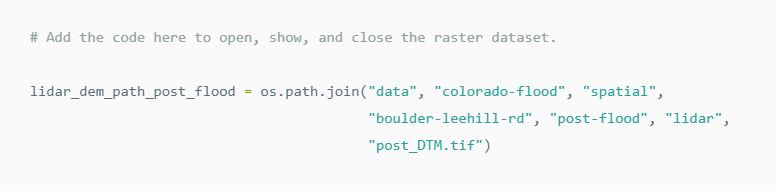

Hint: Don’t forget to use rxr.open_rasterio() and assign the output to a variable! Also, don’t forget to call .values on your rioxarray when plotting it with plot_rgb, that function needs a numpy array input to work!

An example of what your plot should look like is below

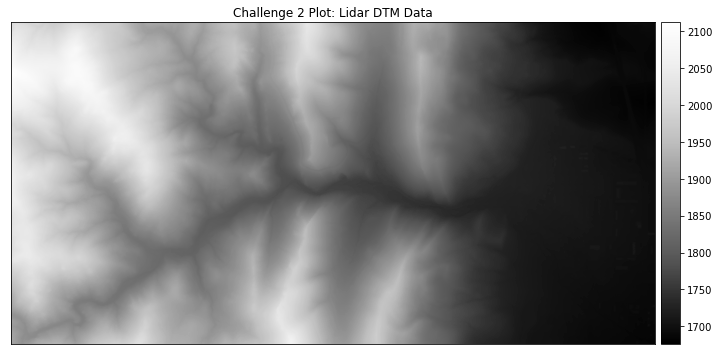

### Ⅶ. 图像--另一种类型的栅格数据

你可能会看到的另一种类型的栅格数据是图像。如果你使用过谷歌地图或其他有图像层的地图工具，你看到的就是栅格数据。你也可以用Python打开并绘制图像数据。

下面你可以下载并打开一些NAIP数据，这些数据是在科罗拉多州尼德兰附近发生的火灾前收集的

In [ ]:
# Download NAIP data
et.data.get_data(url="https://ndownloader.figshare.com/files/23070791")

In [ ]:
# Create a path for the data file - notice it is a .tif file
naip_pre_fire_path = os.path.join("earthpy-downloads",
                                  "naip-before-after",
                                  "pre-fire",
                                  "crop",
                                  "m_3910505_nw_13_1_20150919_crop.tif")

naip_pre_fire_path

In [ ]:
# Open the data using rioxarray
naip_pre_fire = rxr.open_rasterio(naip_pre_fire_path)

naip_pre_fire

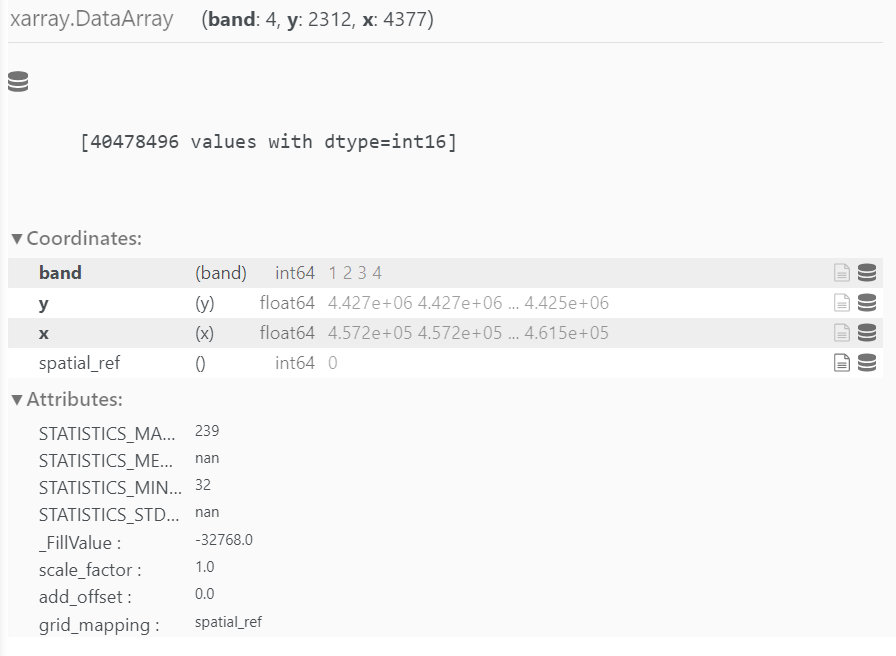

绘制图像有点不同，因为图像是由多个波段组成的。虽然我们不会在本课中讨论波段和图像的具体细节，但你可以在下面看到，一幅图像是由多层信息组成的。

你可以用plot_bands()单独绘制每个波段，如下图所示。或者你可以绘制一个彩色图像，类似于你的相机拍照时存储的图像。

In [ ]:
# Plot each layer or band of the image separately
ep.plot_bands(naip_pre_fire, figsize=(10, 5))
plt.show()

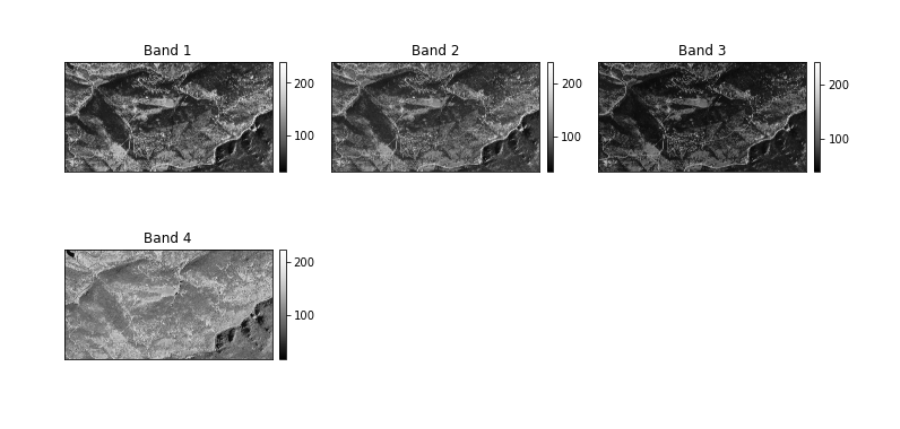

In [ ]:
# Plot color image
#
ep.plot_rgb(naip_pre_fire.values,
            title="naip data pre-fire")
plt.show()

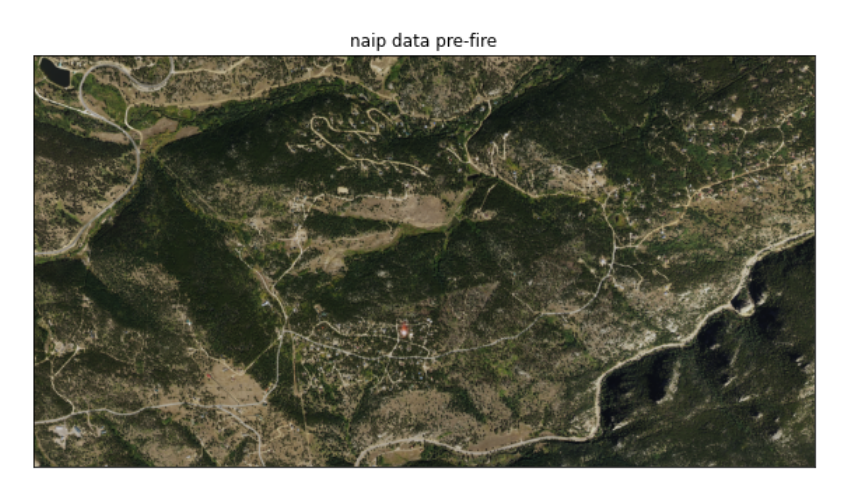

## 第3课：开源Python中的空间矢量数据文件格式介绍

### Ⅰ. 关于空间矢量数据

矢量数据是由被称为顶点的离散几何位置（x、y值）组成的，它定义了空间对象的 "形状"。顶点的组织决定了你所处理的矢量的类型。有三种类型的矢量数据。

- 点:每个单独的点都由一个X、Y坐标定义。点数据的例子包括：采样地点、单个树木的位置或地块的位置。

- 线:线由许多（至少2个）顶点或点组成，这些顶点是连接在一起的。例如，一条道路或一条河流可以用一条线来表示。这条线是由一系列线段组成的，道路或溪流中的每一个 "弯 "都代表一个顶点，有明确的x、y位置。

- 多边形:一个多边形由3个或更多的顶点组成，这些顶点是连接和 "封闭 "的。因此，地块边界、湖泊、海洋、州或国家的轮廓通常由多边形表示。

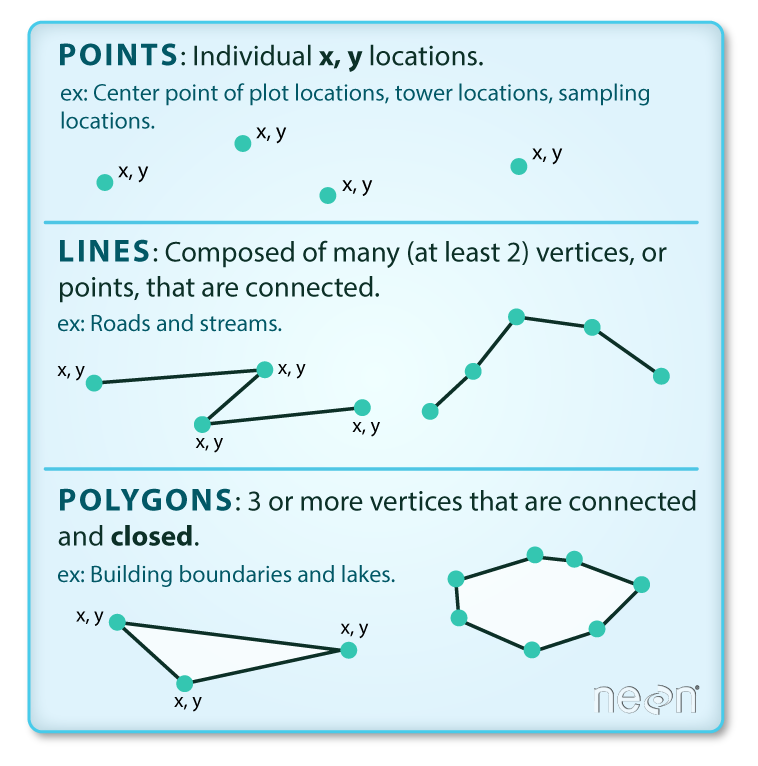

### Ⅱ. 存储点、线和多边形的Shapefile文件格式简介

矢量格式的地理空间数据通常以shapefile格式（.shp）存储。由于点、线和多边形的结构不同，每个单独的shapefile只能包含一种矢量类型（所有点、所有线或所有多边形）。你不会在一个单一的shapefile中找到点、线和多边形的混合对象。

存储在shapefile中的对象通常有一组描述数据的相关属性。例如，一个包含溪流位置的线状图文件可能还包含相关的溪流名称、溪流 "顺序 "和关于每个溪流线对象的其他信息。

### Ⅲ. GeoJSON文件和其他矢量格式

shapefile并不是矢量数据的唯一存储方式。地理空间数据也可以用[GeoJSON格式](https://en.wikipedia.org/wiki/GeoJSON)来传递，甚至可以用表格格式，其中空间信息包含在列中。

### Ⅳ. 哪些数据是以空间矢量格式存储的？

通常以矢量格式提供的数据的一些例子包括:

- 人口普查数据，包括城市边界
- 道路、电力线和其他基础设施的边界
- 政治边界
- 建筑物的轮廓
- 水体和河流系统
- 生态边界
- 城市位置
- 物体位置，包括地块、河流测量仪和建筑位置

### Ⅴ. 使用Geopandas将Shapefile数据导入Python中

你将使用 geopandas 库来处理 Python 中的矢量数据。Geopandas是建立在Python Pandas库之上的。它以表格、数据框架的格式存储空间数据。

In [ ]:
# Import packages
import os

import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

首先，将你的工作目录设置为earth-analytics，然后下载一个单一的shapefile。你将从与自然地球国家边界线层的工作开始。

In [ ]:
# Download the data and set working directory
et.data.get_data(
    url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip')

# Set working directory - earthpy creates earth-analytics for you in your home dir
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

接下来，你用Geopandas打开数据。你可以用.head()查看数据的前5行，就像你用.head()查看Pandas数据框的方式一样。

In [ ]:
coastlines_url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/physical/ne_50m_coastline.zip"

et.data.get_data(url=coastlines_url)

coastlines_path = os.path.join("data", "earthpy-downloads",
                               "ne_50m_coastline",
                               "ne_50m_coastline.shp")

coastlines = gpd.read_file(coastlines_path)
coastlines.head()

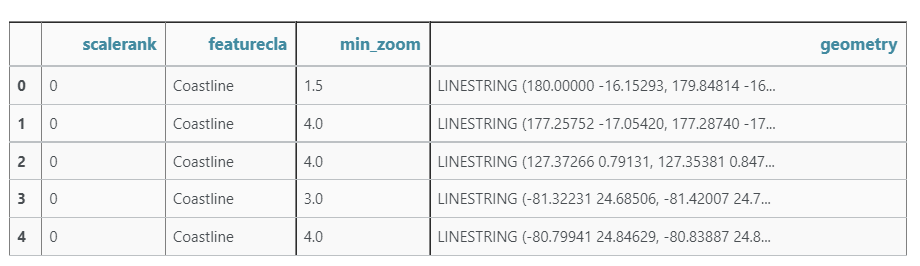

#### **1. GeoPandas创建的GeoDataFrame具有与Pandas数据框架相同的结构**

Geopandas的GeoDataFrame的结构与Pandas的数据框架非常相似。一些区别包括:

- GeoDataFrame包含一个存储空间信息的几何列。GeoDataFrame中的几何列存储的是边界信息（构成数据中每个形状的线）。这使您可以绘制点、线或多边形。
- TheGeoDataFrame存储空间属性，如坐标参考系和空间范围。

与Pandas类似，你可以使用.plot()绘制数据。

In [ ]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
coastlines.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Global Coastline Boundaries")
plt.show()

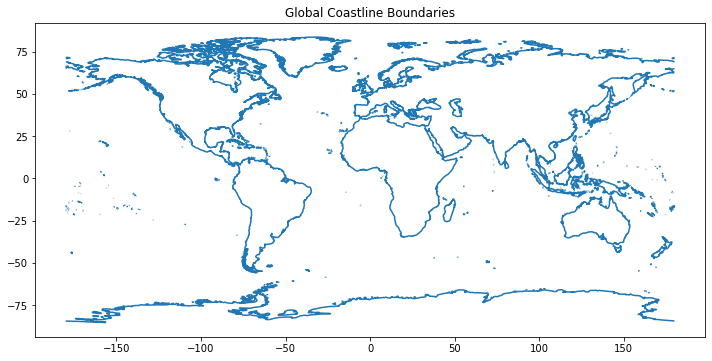

#### 2. 检查空间矢量数据类型

你可以通过查看数据来了解shapefile中存储的是什么类型的数据（点、线或多边形）。然而，你也可以通过调用.geom_type获得该信息

In [ ]:
# Is the geometry type point, line or polygon?
coastlines.geom_type

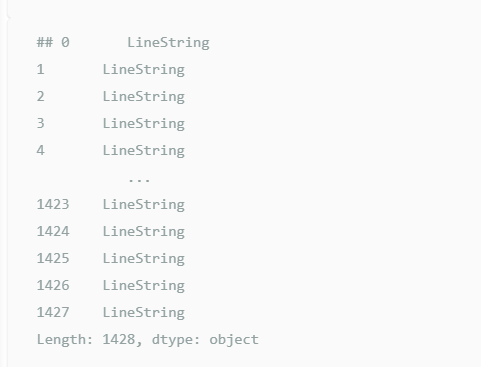

与Pandas类似，你也可以使用.info()查看关于GeoDataFrame的描述性信息。这包括列数、行数以及每列的标题名称和类型。

In [ ]:
coastlines.info()

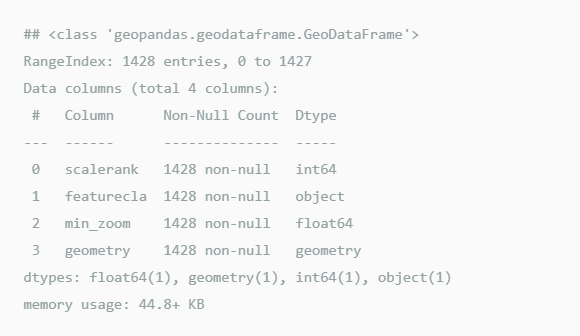

### Ⅵ. 打开矢量点数据

接下来，你将使用Geopandas打开另一个shapefile

In [ ]:
# Open a second layer
et.data.get_data(
    url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_populated_places_simple.zip')

# Create a path to the populated places shapefile
populated_places_path = os.path.join("data", "earthpy-downloads",
                                     "ne_50m_populated_places_simple",
                                     "ne_50m_populated_places_simple.shp")

cities = gpd.read_file(populated_places_path)
cities.head()

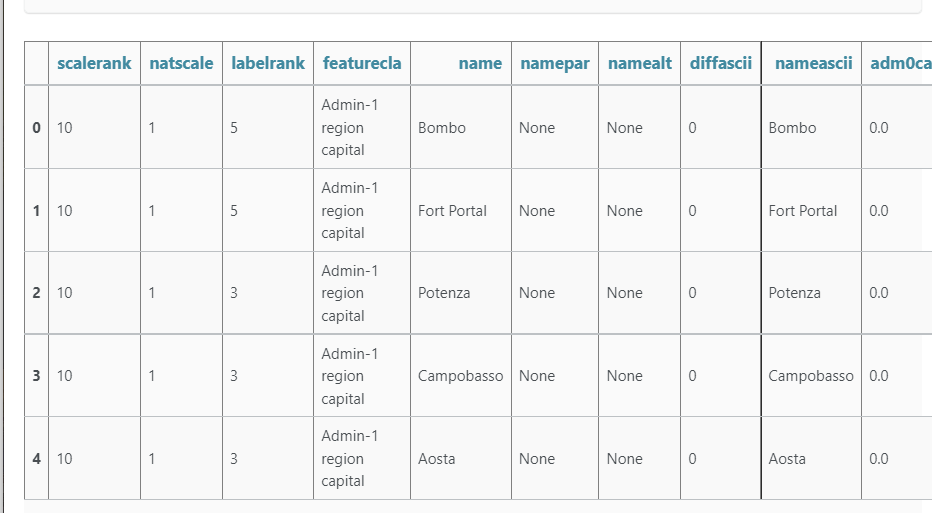

## Challenge 1: What Geometry Type Are Your Data

Check the geometry type of the cities object that you opened above in your code.

### Ⅶ. 使用多个Shapefile创建地图

你可以使用Geopandas的多个形状文件来创建地图，方法类似于使用ArcGIS或QGIS（ArcGIS的开源替代品）等图形用户界面（GUI）工具。要做到这一点，你需要打开第二个空间文件。下面你将使用Natural Earth人口密集的地方shapefile来为你的地图添加额外的层。

为了将两个数据集绘制在一起，你将首先创建一个Matplotlib图形对象。注意在下面的例子中，你在第一行中定义了数字ax1。然后你告诉GeoPandas使用参数ax=在该图上绘制数据。

代码看起来像这样:

boundary_lines.plot(ax=ax1)

In [ ]:
f, ax1 = plt.subplots(figsize=(10, 6))
coastlines.plot(ax=ax1)
plt.show()

## 第4课：文件格式练习

In [ ]:
# Importing packages needed to complete this lesson
import os

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import earthpy as et